# Exploratory Data Analysis

### The document below guides step by step handling of EDA for every possible data set,
### Comments are added and all commands which does not make sense for current data set can be commented out 

#### Necessary dependencies

In [4]:
import os     #to fix working directory
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno

ModuleNotFoundError: No module named 'missingno'

In [4]:
#pip install missingno

In [ ]:
#defining working directory

os chdir('C:/Users/Jains/Desktop/Folder1')

###### Basic Uploading Data and knowing its dimensions and datatypes

In [ ]:
df= pd.read_csv('abc.csv')   #pd.read_excel (r'Path where the Excel file is stored\File name.xlsx',sheet_name='sheet1')
                             #if data in excel format
df.head(3)                             

In [ ]:
df.columns = df.iloc[0]      #if data starts from 2nd row...Promoting the headers
df = df[1:]

In [ ]:
df.shape                     #returns (total rows,total columns in df)

In [ ]:
df.info()                    #returns columns with non null values, datatypes (df.dtypes can also be used) in df

In [ ]:
df.describe()                #returns desciptive summary of numerical columns if any, 
df.describe(include=['O']    #else gives unique,most frq value and its frequency.... df.describe(include=['O']

In [ ]:
num_cols=df._get_numeric_data().columns
list(set(df.columns)-set(num_columns))

# or

df.select_dtypes('float')  #np.number, exclude='float'

#or plotting number of columns of each type

data_type=pd.DataFrame(df.dtypes.value_counts()).reset_index().rename(columns={'index':'Variable_type',0:'Count'})
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=data_type,x='Variable_type',y='Count',ax=ax)
ax.set(xlabel='Type of variable',ylabel='Count of columns',title='Variable count across data types')

In [ ]:
df['col1'] = df['col1'].astype('float')   #float(decimal) and int types for numeric data
df['col2'] = df['col2'].astype('str')     #str and category types consume same memory
df['col2'].astype(str).str.strip().astype('category')   #str.strip rips off white trailing spaces and trims string

###### Dropping columns

In [ ]:
drop_cols=['col1','col2']

df= df.drop(drop_cols,axis=1)

In [ ]:
#replcae spaces in column name

df.columns=df.columns.str.replace(" ","_")

In [ ]:
#drop duplicate rows if any

df=df.drop_duplicates(subset='col1',keep=first)     #keep='first','last', FALSE

In [ ]:
#sort w.r.t a col
df.sort_values(by=['col1','col2'],ascending=False).head(2)  #inplace=True if replace passed dataset

In [ ]:
# function to get data columns for largest and smallest value in each column

def min_max_col(col):
    top = df[col].idxmax()
    top_obs=pd.DataFrame[df.loc[top]]
    bot = df[col].idxmin()
    bot_obs=pd.DataFrame[df.loc[bot]]
    
    min_max_obs=pd.concat([top_obs,bot_obs],axis=1)
    
    
#Also nlargest/nsmallest of any column can be taken

df.nlargest(n,['col1'])   #nsmallest

In [ ]:
min_max_col('col1')

### Plot and checking the columns

In [ ]:
#histogram for continuous data
n_bins=10
plt.hist(df['col1'],n_bins)

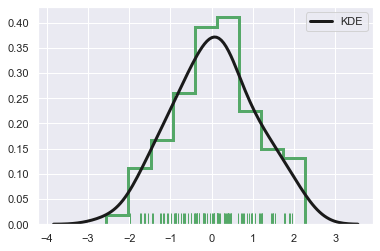

In [5]:
#probablity distribution function(pdfs)

#KDE in black below is Kernel Density Estimation, to estimate pdf of continuous random variable;
    #It is used for non parametric analysis

sns.set(); np.random.seed(0)
x = np.random.randn(100)
# ax = sns.distplot(x)

# ax = sns.distplot(x, rug=True, hist=False)   #rug plots are for knowing which x values are present in data, 
                                               #like eg 0.5-0.6 not there

ax = sns.distplot(x, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})


In [ ]:
#Plotting KDEs(Kernel Density Estimates)

plt.figure(figsize=(2*no_of_columns,5*no_of_rows))
for i in range(0,len(df.columns)):
    plt.subplot(no_of_rows+1,no_of_columns,i+1)      #plt.subplot(nrows,ncols,index)
    sns.distplot(df[df.columns[i]],kde=True)

In [ ]:
#Box Plots though outlier treatment later stage
df.boxplot(column='col1',by='col2')    or sns.boxplot(x=df['col1'])

no_of_columns=12
no_of_rows = len(df.columns)-1/no_of_columns

#multiple boxplots
plt.figure(figsize=(2*no_of_columns,5*no_of_rows))
for i in range(0,len(df.columns)):
    plt.subplot(no_of_rows+1,no_of_columns,i+1)      #plt.subplot(nrows,ncols,index)
    sns.set_style('whitegrid')
    
    sns.boxplot(df[df.columns[i]],color='green',orient='v')
    plt.tight_layout()

In [ ]:
#Violin Plot
g= sns.catplot(x='col1',y='col2',
               hue='col3',col='col4',
              data=df,kind='violin',split=True,
              height=4, aspect=0.7)     # shows violin for col1, col2 on y, colour split on col3 and spearate columns for col4 types
f=sns.violinplot(x='col1',y='col2',hue='col3',
                data=df,split=True,scale='count')    #scale can be 'area','count','width', depending upon violin similarity

In [ ]:
#countplot
sns.countplot(df.col1)

### Missing Values

In [1]:
# First Need of data:,  Kaggle Kernels, Medium and Towards Data Science

In [ ]:
# First standard missing notation for all column
df['Gender'].fillna('No Gender',inplace=True)
df['col1'].replace(to_replace=np.nan, value=-90})

In [ ]:
#Propogation, Correlation, One hot encoding(nominal), label encoding(ordinal), balanced, imbalanced dataset


In [ ]:
df.apply(lambda x: sum(x.isnull()),axis=0)   #returns column name and number of missing entries

sns.heatmap(df.isnull(),cbar= False)

###### Missingno Library


In [ ]:
Nullity Matrix;---msno.matrix(df) 
Bar Chart of percentage missing in each column---msnobar() 
Heat map for correlation between missing in one coumn to othr, lower the correlation indicates MAR()---msno.heatmap()  
Dendogram(more similar missingness in 1 col to other than they will be grouped together first)---msno.dendogram()

In [2]:
# MCAR(Missing Completely at random)--n ppl absent in class due to their own reasons--- Deletion row/col
    # The missing value is missing completely at random. The propensity for a data point to be 
    # missing does not have anything to do with its hypothetical value and with the values of other variables.
    
LittleMCAR test available in R , to check significance of hypothesis that all missing data are MCAR., 
but python can not find similar lib.      

# MAR(Missing at random)--flue season and n ppl absent---Imputtation single/Mul
    # The missing value is missing due to some of the observed data. The propensity for a data point 
    # to be missing is not related to missing data, but it is related to some of the observed data.

# MNAR(Missing not at random)--on test day n ppl absent, indicating not well prepared d=students(adverse selection)---Improve/Sensitize(find data, or best/worse case scenario)
    # The missing value is missing not at random. There are reasons for this. Often, the reasons are that the missing value depends 
    # on the hypothetical value or it is dependent on another variable’s value.

In [ ]:
# generate preview of entries with null values
if len(df[df.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()
        
Eg Image    

In [2]:
#<img src='Missingno.png' style="width:200px;height:400px"/>   and then markdown, 
#here bkank spaces sk=hows missing values
#Or use ![](Missingno.png)   

In [ ]:
# Treatment of missing values
# If MCAR
#         -Listwise Deletion  .....removing the entire record 
            # can reduce sample size. 
            # Unless you are sure that the record is definitely not MNAR, this technique may introduce bias into the dataset.
#         -Pairwise Deletion  .....method that uses the correlation between pairs of
#                                 variables to maximize data available on an analysis by analysis basis.
            # Disadvantages — It’s difficult to interpret parts of 
            # your model due to the fact that there are different numbers of observations contributing to different parts of your model.
#         -Column Deletion
# FOR CATEGORICAL VARIABLE OPTIONS(new category, Logistic, Knn, multiple imputation)

#         -Mean/Median/Central Tendency --reduces variance

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median' or 'most_frequent', df.fillna(constant)
imp_mean.fit(train)
imputed_train_df = imp_mean.transform(train)



--OR--
df.Column_Name.fillna(df.Column_Name.mean(), inplace=True)
df.Column_Name.fillna(df.Column_Name.median(), inplace=True)
df.Column_Name.fillna(df.Column_Name.mode(), inplace=True)




#         - k-NN

import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# (start the KNN training)
imputed_training=fast_knn(train.values, k=30)

--OR-- continuous(Euclidean Method) and categorical(Hamming Distance) 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

k_range=range(1,26)

for k in k_range :
    imp=Imputer(missing_values='NaN',strategy='mean',axis=0)
    knn=KNeighborsClassifier(n_neighbors=k)
    steps=[('imputation',imp),('K-Nearest Neighbor',knn)]
    pipeline=Pipeline(steps)
    X_train, X_test, Y_train, Y-test = train_test_split(X,y,test_size=0.3,random_state=42)
    pipeline.fit(X_train,Y_train)
    y_pred=pipeline.predict(X_test)
    pipeline.score(X_test, Y_test)
    
    
#         -Hot Deck Method--similar obs's value imputed
#         -Single Regression imputation--predicted value-std error is deflated, there must be a linear relationship  

from sklearn.linear_model import LinearModel
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

imp=imputer(missing_values='NaN',strategy='mean',axis=0)
linmodel=Linearmodel()
steps=[('imputation',imp),('linear_regression',linmodel)]
pipeline=Pipeline(steps)
X_train, X_test, Y_train, Y-test = train_test_split(X,y,test_size=0.3,random_state=42)
pipeline.fit(X_train,Y_train)
y_pred=pipeline.predict(X_test)
pipeline.score(X_test,Y_test)

#         -Logistics Regression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
imp=Imputer(missing_values="NaN", strategy="mean", axis=0)
logmodel = LogisticRegression()
steps=[('imputation',imp),('logistic_regression',logmodel)]
pipeline=Pipeline(steps)
X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.3, random_state=42)
pipeline.fit(X_train, Y_train)
y_pred=pipeline.predict(X_test)
pipeline.score(X_test, Y_test)

#         -Stochastic Regression--bias reduced by augmenting pred vlaue by residual term-variance preserved, unbiased estimate


Multiple Imputation
          -Multivariate imputation by chain equations--handle cont/binary data---creating multiple 'complete datasets' 
            by filling missing data multiple times
#             imputing data with mice()
#             building model using with()
#             pooling results for all models using pool()

from impyute.imputation.cs import mice

# start the MICE training
imputed_training=mice(train.values)        
        
If MNAR--Sensitivity analysis
          -Best/worst case to show ramge of uncertainty due to missing values 
    
    
Deep Learning(Datawig)

import datawig

df_train,df_test= datawig.utils.random_split(train)

#Initialise a SimpleImputer Model
imputer= datawig.SimpleImputer(
            input_columns =['1','2','3','4','target'],  # column(s) containing information about the column we want to impute

            output_column ='0', # the column we'd like to impute values for
            output_path = 'imputer_model' )  #stores model data and metrics
#Fit an imputer model on train model data
imputer.fit(train_df=df_train, num_epochs=50)

#Impute missing values and return orginal dataframe with predictions

imputed=imputer.predict(df_test)


In [ ]:
df.dropna(how='all')
df.dropna(axis=1,how='any')

#Treatment 1
df['Gender'].fillna(method='pad',inplace=True)      #previous value
df['Gender'].fillna(method='bfill',inplace=True)    #following value



#Treatment 1
from sklearn.impute import SimpleImputer
my_imputer=SimpleImputer()
df_trans=my_imputer.fit_transform(df)    #fit missing data with mean

#Treatment 2 : Linear Interpolation
df.interpolate(method='linear',limit_direction='forward')

